### GooglePlayStore dataset Analysis

### 📊 Summary
In a study of apps updated between 2010 and 2018 from the Google Play dataset
https://www.kaggle.com/datasets/lava18/google-play-store-apps

the following results were obtained:
- Definition of successful apps
- Top 10 app categories:
1. Family
2. Game
3. Tools
4. Medical
5. Business

- Grouping of categories based on the average rate of each category
- Average app rating: 4.2
- Most apps in the category: "Family" and "Games"
- Paid apps have a higher average rating.
- The highest ratings belong to educational and health apps.
- What keywords are repeated in the names of successful apps: video , Free , photo , language , live , App , New , wallpaper

- For free apps, we performed a random forest regression model and a linear regression model on free apps

Both models show a small amount of change in the rating variable and have a high error.

Now we can say that in free apps, the user rating does not depend on the number of installations, the size of the app, the number of visits, and their category.

The value of the categories was considered equal to each other, and we converted the category data to binary and numbers using the one-hot encoding method.

- Do you want to see what rating users usually give? Usually 4.5

- Which features are related to the rating?
Apps with more installations are likely to have received more reviews (strong positive correlation)

. An increase in the number of reviews is slightly correlated with an increase in the size of the app, but this relationship is not very strong. (Weak positive correlation)

The size of the app has almost no linear relationship with the number of its installs. (Very weak negative correlation)

- Which categories have attracted the most installs?
1.Game    
2.News and magazines    
3.Communication
- Which apps have been the most successful with the least size?
1. Free Books - Spirit Fanfiction and Stories
2. Call Blocker
3. Learn English with Wlingua

- Apps that users like but have not yet become popular:
1.Awake Dating    
2.Fr. Mike Schmitz Audio Teachings    
3.Fr. Daoud Lamei

- Apps that have been widely installed but have had dissatisfied users:

1.AppFinder by AppTap    
2.Moto Z Market    
3. CZ File Manager

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [189]:
df = pd.read_csv("googleplaystore.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


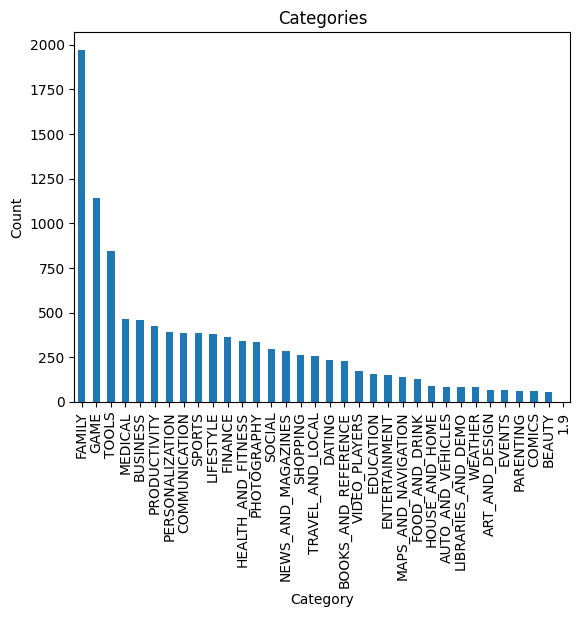

In [190]:
df['Category'].value_counts().plot(kind='bar')
plt.title("Categories")
plt.ylabel("Count")
plt.show()

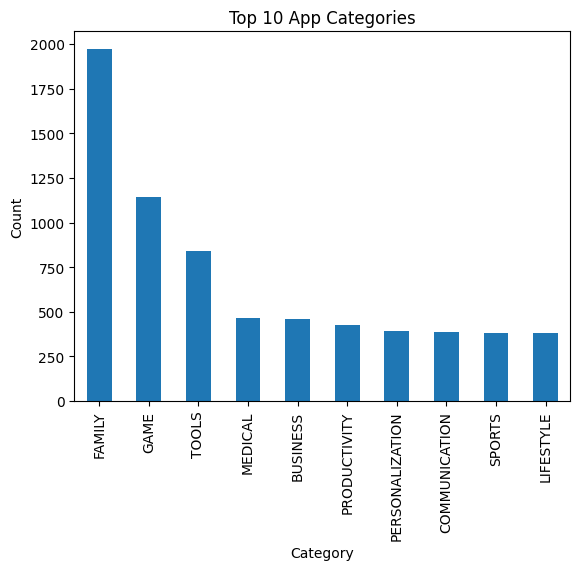

In [191]:
df['Category'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 App Categories")
plt.ylabel("Count")
plt.show()

- ##### Grouping categories based on the average score of each category

In [192]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
SHOPPING                4.259664
SOCIAL                  4.255598
WEATHER                 4.244000
SPORTS                  4.223511
PRODUCTIVITY            4.211396
HOUSE_AND_HOME          4.197368
FAMILY                  4.192272
PHOTOGRAPHY             4.192114
AUTO_AND_VEHICLES       4.190411
MEDICAL                 4.189143
LIBRARIES_AND_DEMO      4.178462
FOOD_AND_DRINK          4.166972
COMMUNICATION           4.158537
COMICS                  4.155172
NEWS_AND_MAGAZINES      4.132189
FINANCE                 4.131889
ENTERTAINMENT           4.126174
BUSINESS                4.121452
TRAVEL_AND_LOCAL        4.109292
LIFESTYLE               4.094904
V

In [193]:
def clean_installs(value):
    try:
        value = str(value).replace(',', '').replace('+', '').strip()
        return int(float(value))
    except:
        return np.nan
df['Installs'] = df['Installs'].apply(clean_installs)

- اپ های موفق در چه کتگوری هایی قرار دارند
- اپ موفق اپی که امتیاز بالا ۴.۵بگیرد و تعداد نصب بیشتر از ۱ میلیون داشته باشد
- What categories do successful apps fall into? game & family
- A successful app is one that has a high rating of 4.5 and more than 1 million installs.

In [194]:
top_apps = df[(df['Rating'] > 4.5) & (df['Installs'] > 1000000)]
top_apps['Category'].value_counts().head(10)

Category
GAME                  132
FAMILY                 46
HEALTH_AND_FITNESS     33
TOOLS                  30
PRODUCTIVITY           26
EDUCATION              23
PHOTOGRAPHY            22
PERSONALIZATION        21
SHOPPING               20
SOCIAL                 14
Name: count, dtype: int64

- بررسی اینکه چه کلمات کلیدی در نام اپ های موفق تکرار میشن
- Checking what keywords are repeated in the names of successful apps

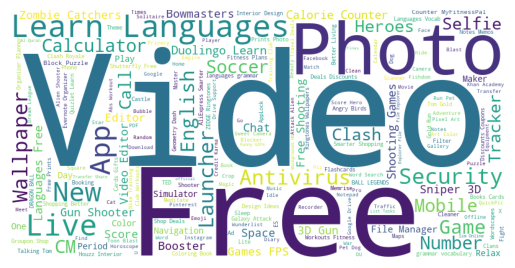

In [195]:
text = " ".join(df[(df['Rating'] > 4.5)&(df['Installs'] > 1000000)]['App'].dropna())
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wc)
plt.axis('off')
plt.show()